In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
# Load the dataset
data  = pd.read_csv("cirrhosis.csv")

girly_cmap  = LinearSegmentedColormap.from_list(
    "custom_girly", ["#FADADD", "#6B0035"]
)

In [ ]:
data.head(20)

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,...,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Stage_combined
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,...,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4,4
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,...,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3,3
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,...,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4,4
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,...,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4,4
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,...,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3,3


In [ ]:
data.describe().round(2)

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
count,418.00,418.00,418.00,418.00,284.00,418.00,310.00,312.00,312.00,282.00,407.00,416.00
mean,209.50,1917.78,18533.35,3.22,369.51,3.50,97.65,1982.66,122.56,124.70,257.02,10.73
std,120.81,1104.67,3815.85,4.41,231.94,0.42,85.61,2140.39,56.70,65.15,98.33,1.02
min,1.00,41.00,9598.00,0.30,120.00,1.96,4.00,289.00,26.35,33.00,62.00,9.00
25%,105.25,1092.75,15644.50,0.80,249.50,3.24,41.25,871.50,80.60,84.25,188.50,10.00
50%,209.50,1730.00,18628.00,1.40,309.50,3.53,73.00,1259.00,114.70,108.00,251.00,10.60
75%,313.75,2613.50,21272.50,3.40,400.00,3.77,123.00,1980.00,151.90,151.00,318.00,11.10
max,418.00,4795.00,28650.00,28.00,1775.00,4.64,588.00,13862.40,457.25,598.00,721.00,18.00


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              418 non-null    int64  
 1   N_Days          418 non-null    int64  
 2   Status          418 non-null    object 
 3   Drug            312 non-null    object 
 4   Age             418 non-null    int64  
 5   Sex             418 non-null    object 
 6   Ascites         312 non-null    object 
 7   Hepatomegaly    312 non-null    object 
 8   Spiders         312 non-null    object 
 9   Edema           418 non-null    object 
 10  Bilirubin       418 non-null    float64
 11  Cholesterol     284 non-null    float64
 12  Albumin         418 non-null    float64
 13  Copper          310 non-null    float64
 14  Alk_Phos        312 non-null    float64
 15  SGOT            312 non-null    float64
 16  Tryglicerides   282 non-null    float64
 17  Platelets       407 non-null    flo

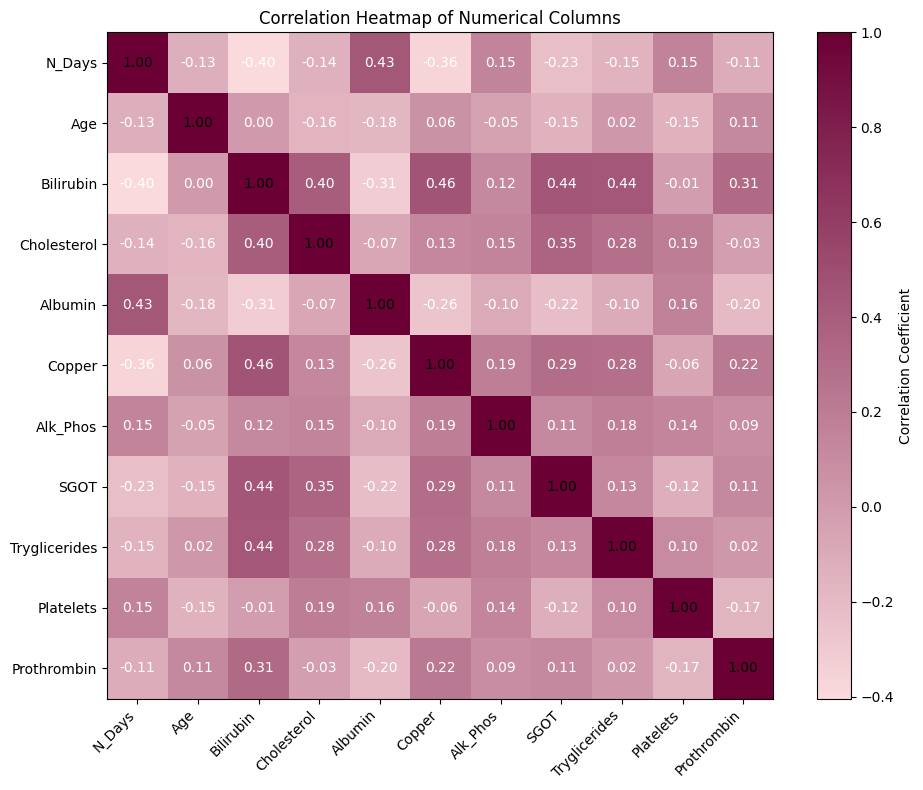

In [2]:
# Select only numerical columns from the data
numerical_columns = data.select_dtypes(include=['float64', 'int64'])
numerical_columns = numerical_columns.drop('ID', axis=1)
numerical_columns = numerical_columns.drop('Stage', axis=1)
# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Plot the correlation matrix with annotations
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap=girly_cmap, interpolation='none')
plt.colorbar(label='Correlation Coefficient')

# Annotate each cell with the correlation value
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        value = correlation_matrix.iloc[i, j]
        plt.text(
            j, i, f'{value:.2f}',
            ha='center', va='center',
            color='white' if abs(value) < 0.5 else 'black'
        )

# Set axis labels and title
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45, ha='right')
plt.yticks(range(len(correlation_matrix.index)), correlation_matrix.index)
plt.title("Correlation Heatmap of Numerical Columns")
plt.tight_layout()
plt.show()


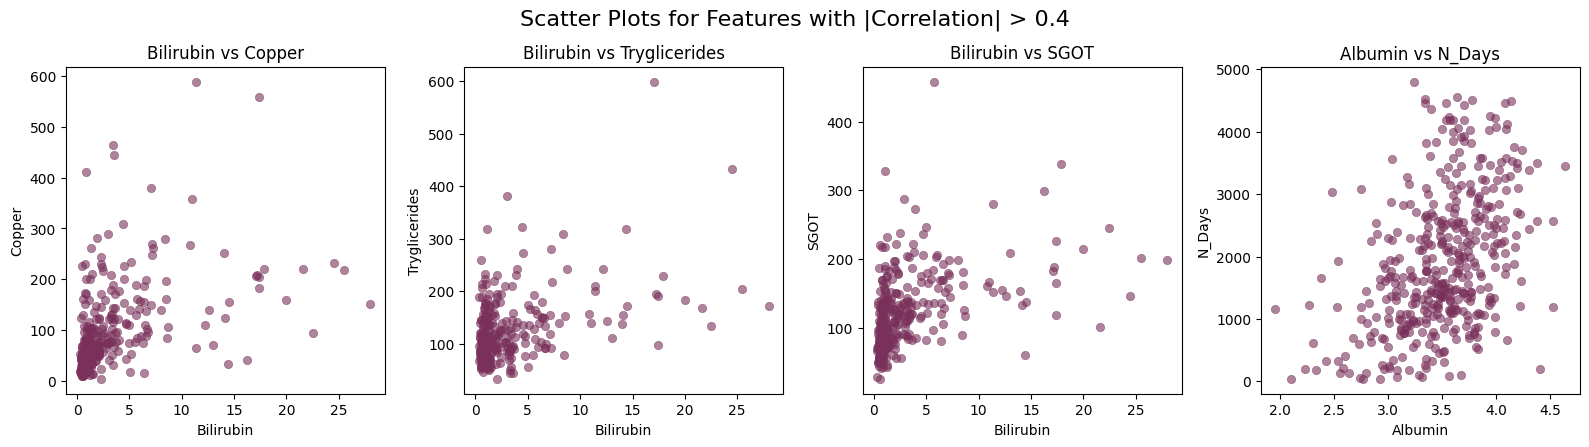

Strongly Correlated Feature Pairs:
Bilirubin - Copper: 0.46
Bilirubin - Tryglicerides: 0.44
Bilirubin - SGOT: 0.44
Albumin - N_Days: 0.43


In [3]:
# Extract the most correlated pairs with a lower threshold of 0.4
threshold = 0.4
correlation_pairs = correlation_matrix.unstack().sort_values(ascending=False)

# Filter pairs to avoid duplicates and self-correlation
strong_pairs = correlation_pairs[(correlation_pairs > threshold) & (correlation_pairs < 1)]
strong_pairs_features = list(set(tuple(sorted(pair)) for pair in strong_pairs.index))

# Prepare grid size for plotting scatter plots in a grid
grid_size = (len(strong_pairs_features) // 4 + 1, 4)
fig, axes = plt.subplots(grid_size[0], grid_size[1], figsize=(16, grid_size[0] * 4))
axes = axes.flatten()

# Plot scatter plots for the most correlated feature pairs
for i, (feature1, feature2) in enumerate(strong_pairs_features):
    sns.scatterplot(
        x=data[feature1],
        y=data[feature2],
        ax=axes[i],
        alpha=0.6,
        edgecolor=None,
        color="#79305a"
    )
    axes[i].set_title(f"{feature1} vs {feature2}")
    axes[i].set_xlabel(feature1)
    axes[i].set_ylabel(feature2)

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle(f"Scatter Plots for Features with |Correlation| > {threshold}", fontsize=16)
plt.tight_layout()
plt.show()

# Display the most strongly correlated feature pairs with their correlation values
print("Strongly Correlated Feature Pairs:")
for pair in strong_pairs_features:
    correlation = correlation_matrix.loc[pair[0], pair[1]]
    print(f"{pair[0]} - {pair[1]}: {correlation:.2f}")

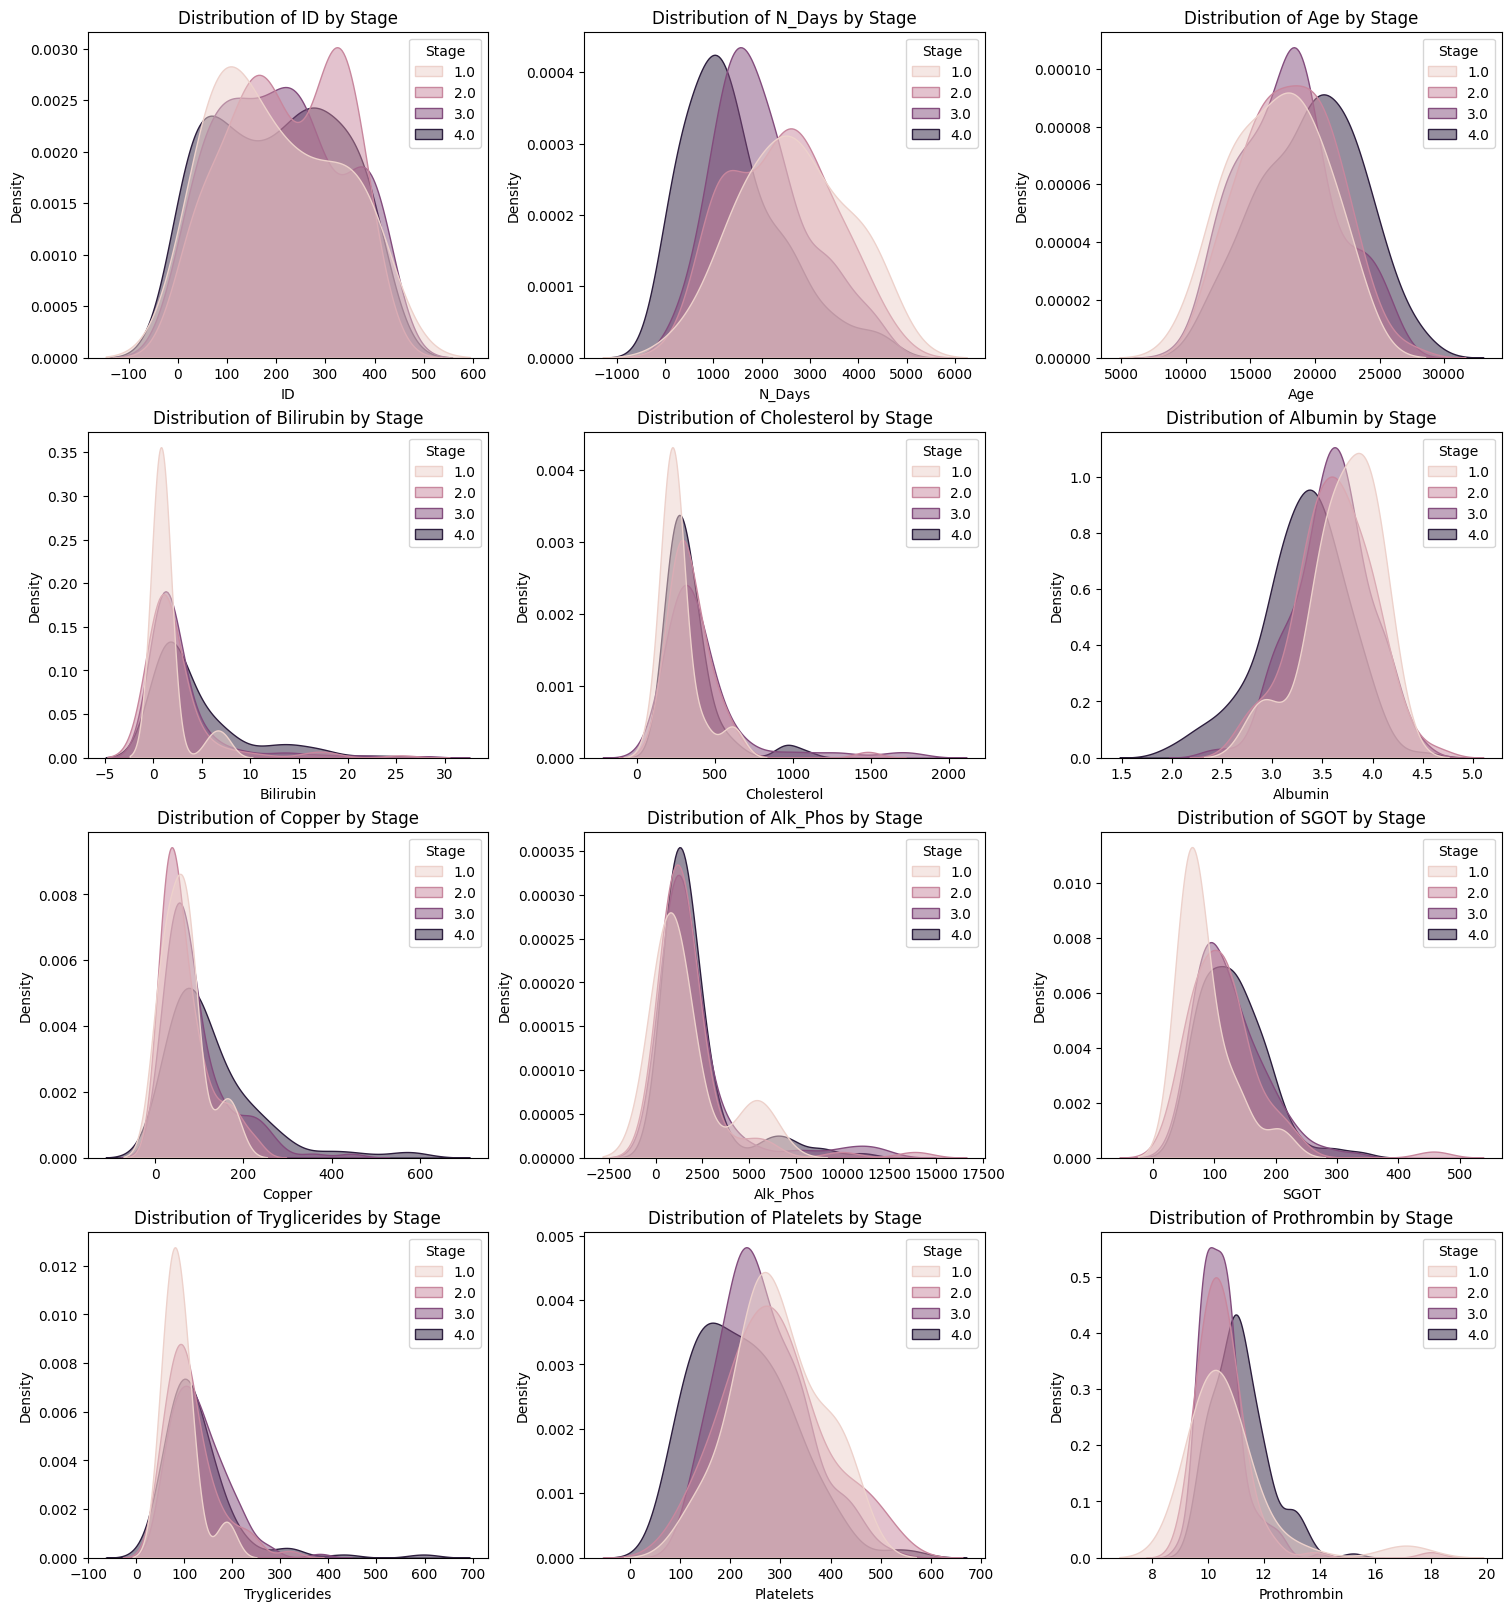

In [4]:
# Select numeric columns for KDE plot
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
numeric_columns = [col for col in numeric_columns if col != 'Stage']  # Exclude 'Stage' from numeric columns

# Set up the grid dimensions
num_columns = 3  # Number of columns in the grid
num_rows = (len(numeric_columns) // num_columns) + (1 if len(numeric_columns) % num_columns != 0 else 0)

# Create the KDE plots grid
fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(15, 4 * num_rows), constrained_layout=True)

# Loop through each numeric column and plot KDE for each stage
for i, column in enumerate(numeric_columns):
    row, col = divmod(i, num_columns)
    ax = axes[row, col] if num_rows > 1 else axes[col]
    sns.kdeplot(data=data, x=column, hue='Stage', fill=True, common_norm=False, alpha=0.5, ax=ax)
    ax.set_title(f'Distribution of {column} by Stage')
    ax.set_xlabel(column)
    ax.set_ylabel('Density')

# Remove empty subplots
for j in range(len(numeric_columns), num_rows * num_columns):
    fig.delaxes(axes.flat[j])

plt.show()


<ipython-input-19-019ad92531e1>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
<ipython-input-19-019ad92531e1>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
<ipython-input-19-019ad92531e1>:20: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(
<ipython-input-19-019ad92531e1>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
<ipython-input-19-019ad92531e1>:20: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot

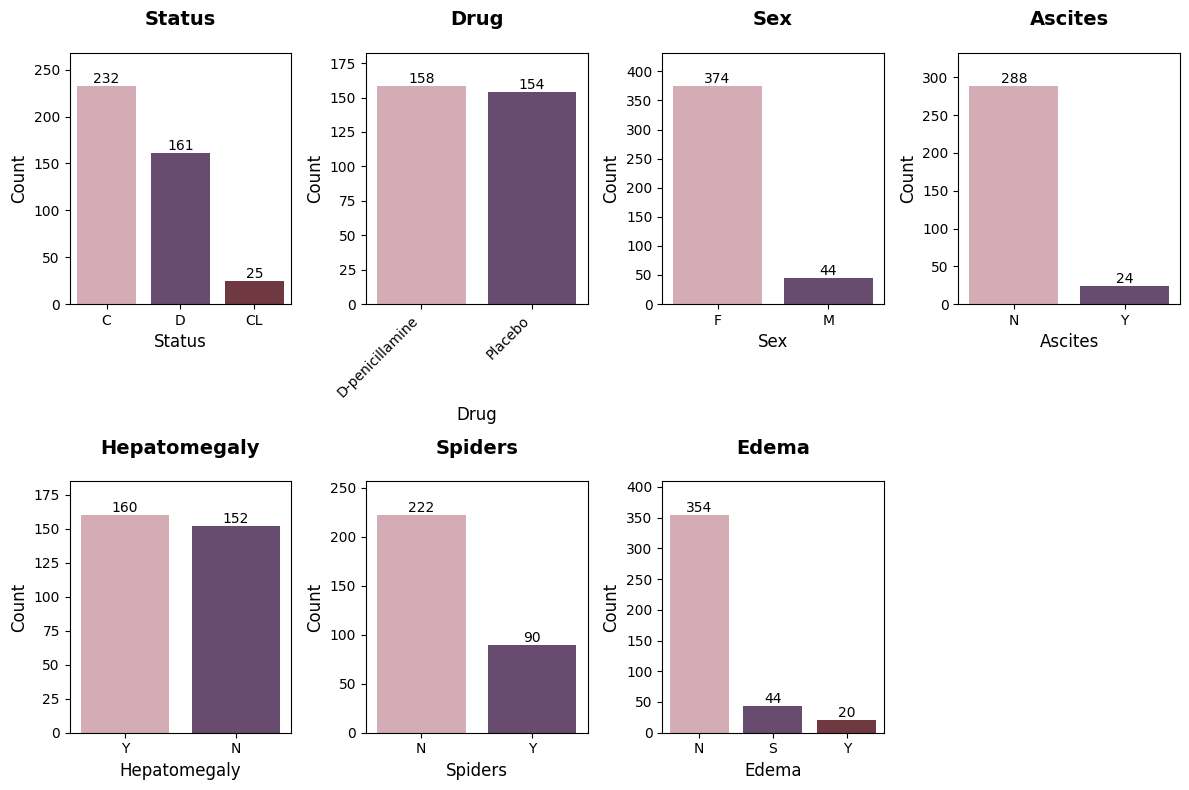

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define categorical columns
categorical_cols = ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']

# Number of columns in the grid
n_cols = 4
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

# Create subplot grid
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, 4 * n_rows))
axes = axes.flatten()

# Define antique pink and purple color palette
antique_pink_purple_palette = ['#d9a5b3', '#6b4675','#79303b']  # Antique pink and purple

# Create count plots for each categorical column
for i, col in enumerate(categorical_cols):
    sns.countplot(
        data=data,
        x=col,
        palette=antique_pink_purple_palette,
        order=data[col].value_counts().index,
        ax=axes[i]
    )

    # Enhance plot styling
    axes[i].set_title(f'{col}', fontsize=14, pad=20, fontweight='bold')
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)

    # Rotate labels if necessary
    max_label_length = max(len(str(label.get_text())) for label in axes[i].get_xticklabels())
    if max_label_length > 5:
        axes[i].tick_params(axis='x', rotation=45)
        for label in axes[i].get_xticklabels():
            label.set_ha('right')

    # Get current y-axis limits
    y_min, y_max = axes[i].get_ylim()

    # Add value labels on top of each bar
    for p in axes[i].patches:
        if p.get_height() > 0:  # Avoid annotating empty bars
            axes[i].annotate(
                f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center',
                va='bottom'
            )

    # Extend y-axis limit to accommodate labels
    # Add 10% padding above the highest bar
    axes[i].set_ylim(y_min, y_max * 1.1)

# Remove unused subplots
for j in range(len(categorical_cols), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout with extra padding
plt.subplots_adjust(wspace=0.3, hspace=0.4)
plt.tight_layout()
plt.show()

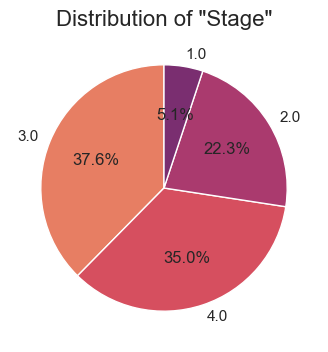

In [ ]:

# Calculate the updated value counts again
stage_counts = data['Stage'].value_counts()

# Create the updated pie chart with integer labels
plt.figure(figsize=(4, 4))  # Adjust the figure size for a pie chart
plt.pie(
    stage_counts,
    labels=stage_counts.index,  # Use the updated stage labels
    autopct='%1.1f%%',  # Show percentages
    startangle=90,  # Rotate the pie chart for better readability
    colors=sns.color_palette("flare", len(stage_counts))  # Use the same "flare" palette
)
plt.title("Distribution of 'Stage'", fontsize=16)
plt.show()

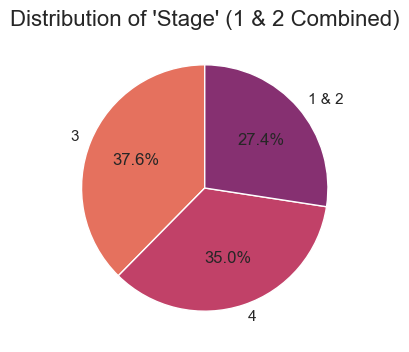

In [ ]:

# Combine Stage 1 and 2 into a single category in the DataFrame
data['Stage_combined'] = data['Stage'].replace({1: '1 & 2', 2: '1 & 2'})

# Calculate the updated value counts for the combined stages
stage_combined_counts = data['Stage_combined'].value_counts()


# Convert the combined stages to integers for cleaner labeling
data['Stage_combined'] = data['Stage_combined'].replace({3.0: 3, 4.0: 4})

# Calculate the updated value counts again
stage_combined_counts = data['Stage_combined'].value_counts()

# Create the updated pie chart with integer labels
plt.figure(figsize=(4, 4))  # Adjust the figure size for a pie chart
plt.pie(
    stage_combined_counts,
    labels=stage_combined_counts.index,  # Use the updated stage labels
    autopct='%1.1f%%',  # Show percentages
    startangle=90,  # Rotate the pie chart for better readability
    colors=sns.color_palette("flare", len(stage_combined_counts))  # Use the same "flare" palette
)
plt.title("Distribution of 'Stage' (1 & 2 Combined)", fontsize=16)
plt.show()


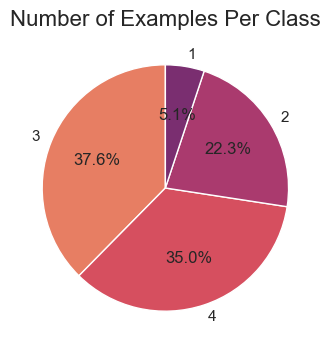

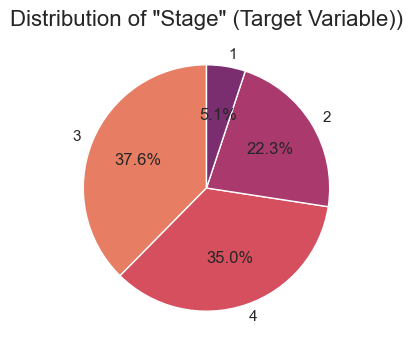

In [ ]:
import matplotlib.pyplot as plt

data = data

# Calculate the value counts for the 'Stage' column
stage_counts = data['Stage'].value_counts()
# Combine Stage 1 and 2 into a single category in the DataFrame
data['Stage'] = data['Stage'].replace({1.0: 1, 2.0: 2, 3.0: 3, 4.0: 4})


# Create the pie chart
plt.figure(figsize=(4, 4))  # Adjust the figure size for a pie chart
plt.pie(
    stage_counts,
    labels= stage_counts.index,  # Use the stage labels
    autopct='%1.1f%%',  # Show percentages
    startangle=90,  # Rotate the pie chart for better readability
    colors=sns.color_palette("flare", len(stage_counts))  # Use the same "flare" palette
)
plt.title('Number of Examples Per Class', fontsize=16)
plt.show()


# Combine Stage 1 and 2 into a single category in the DataFrame
data['Stage_combined'] = data['Stage'].replace({1.0: '1 & 2', 2.0: '1 & 2'})



# Convert the combined stages to integers for cleaner labeling
data['Stage_combined'] = data['Stage_combined'].replace({3.0: 3, 4.0: 4})


# Calculate the updated value counts for the combined stages
stage_combined_counts = data['Stage_combined'].value_counts()

# Create the updated pie chart
plt.figure(figsize=(4, 4))  # Adjust the figure size for a pie chart
plt.pie(
    stage_combined_counts,
    labels=stage_combined_counts.index,  # Use the updated stage labels
    autopct='%1.1f%%',  # Show percentages
    startangle=90,  # Rotate the pie chart for better readability
    colors=sns.color_palette("flare", len(stage_combined_counts))  # Use the same "flare" palette
)
plt.title('Distribution of "Stage" (Target Variable))', fontsize=16)
plt.show()


**Relationships between Variables**

Edema & Number of days

<ipython-input-11-c9402d8e3ceb>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Edema', y='N_Days', palette=custom_palette)
<ipython-input-11-c9402d8e3ceb>:9: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.boxplot(data=data, x='Edema', y='N_Days', palette=custom_palette)


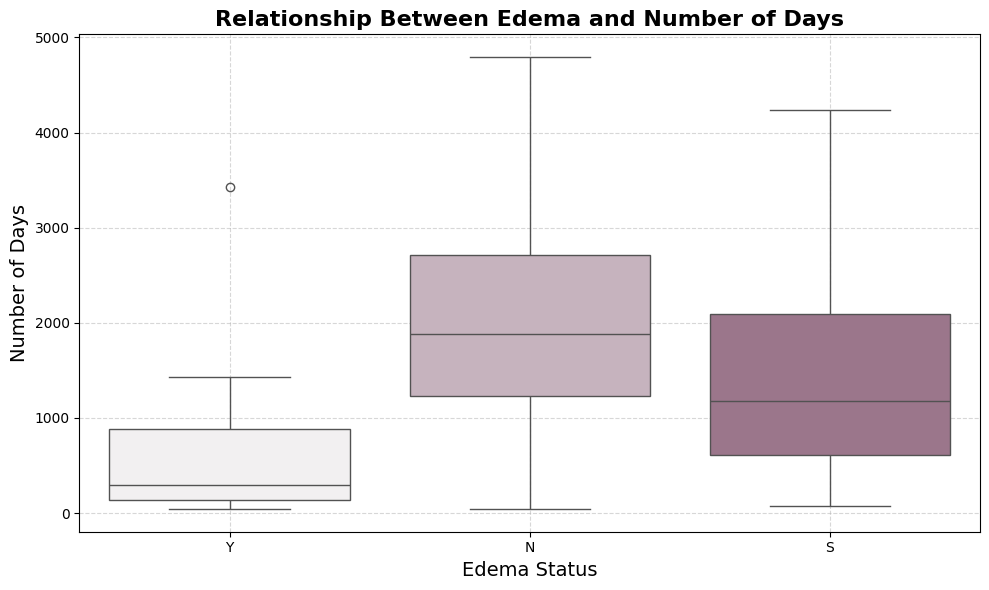

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a custom color palette using shades of the provided color
custom_palette = sns.light_palette("#79305a", n_colors=4, reverse=False)

# Create a box plot to analyze the relationship between Edema and N_Days
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Edema', y='N_Days', palette=custom_palette)

# Add titles and axis labels
plt.title('Relationship Between Edema and Number of Days', fontsize=16, fontweight='bold')  # Bold title
plt.xlabel('Edema Status', fontsize=14)
plt.ylabel('Number of Days', fontsize=14)

# Display the plot
plt.grid(True, alpha=0.5, linestyle='--')
plt.tight_layout()
plt.show()


Age & Disease stage

<ipython-input-10-8673b045b023>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Stage', y='Age', palette=custom_palette)


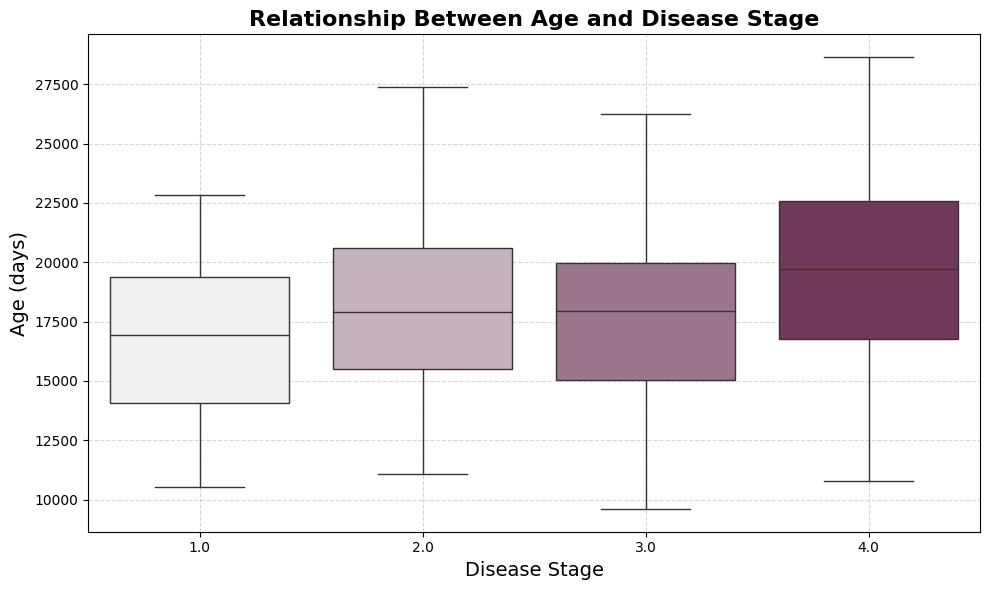

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a custom color palette using shades of the provided color
custom_palette = sns.light_palette("#79305a", n_colors=4, reverse=False)

# Create a box plot to analyze the relationship between Age and Disease Stage
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Stage', y='Age', palette=custom_palette)

# Add titles and axis labels
plt.title('Relationship Between Age and Disease Stage', fontsize=16, fontweight='bold')  # Bold title
plt.xlabel('Disease Stage', fontsize=14)
plt.ylabel('Age (days)', fontsize=14)

# Display the plot
plt.grid(True, alpha=0.5, linestyle='--')
plt.tight_layout()
plt.show()


Drug & Status

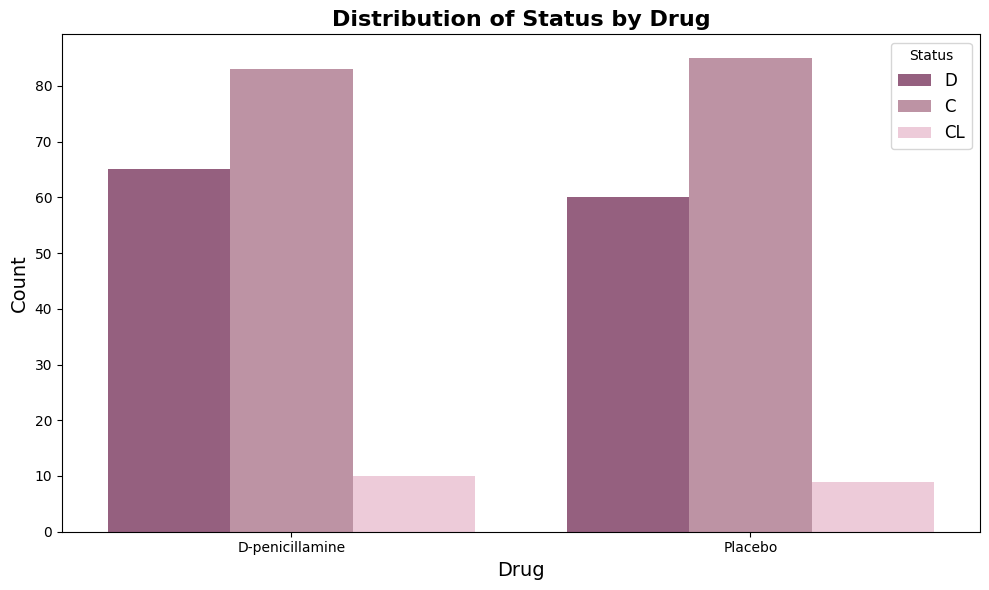

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the custom color palette for the categories
status_palette = ['#9e5780', '#c48ca3', '#f2c6d8']  # Colors for C, CL, D respectively

# Plot the bar chart for the distribution of Status by Drug
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Drug', hue='Status', palette=status_palette)

# Add titles and labels
plt.title('Distribution of Status by Drug', fontsize=16, fontweight='bold')  # Bold title
plt.xlabel('Drug', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Status', fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

<ipython-input-20-9d761446171e>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Drug', y=var, palette=custom_palette)
<ipython-input-20-9d761446171e>:14: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.boxplot(data=data, x='Drug', y=var, palette=custom_palette)
<ipython-input-20-9d761446171e>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Drug', y=var, palette=custom_palette)
<ipython-input-20-9d761446171e>:14: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.boxplot(data=data, x='Drug', y=var, palette=custom_palette)
<ipython-input-20-9d761446171e>:14: Fu

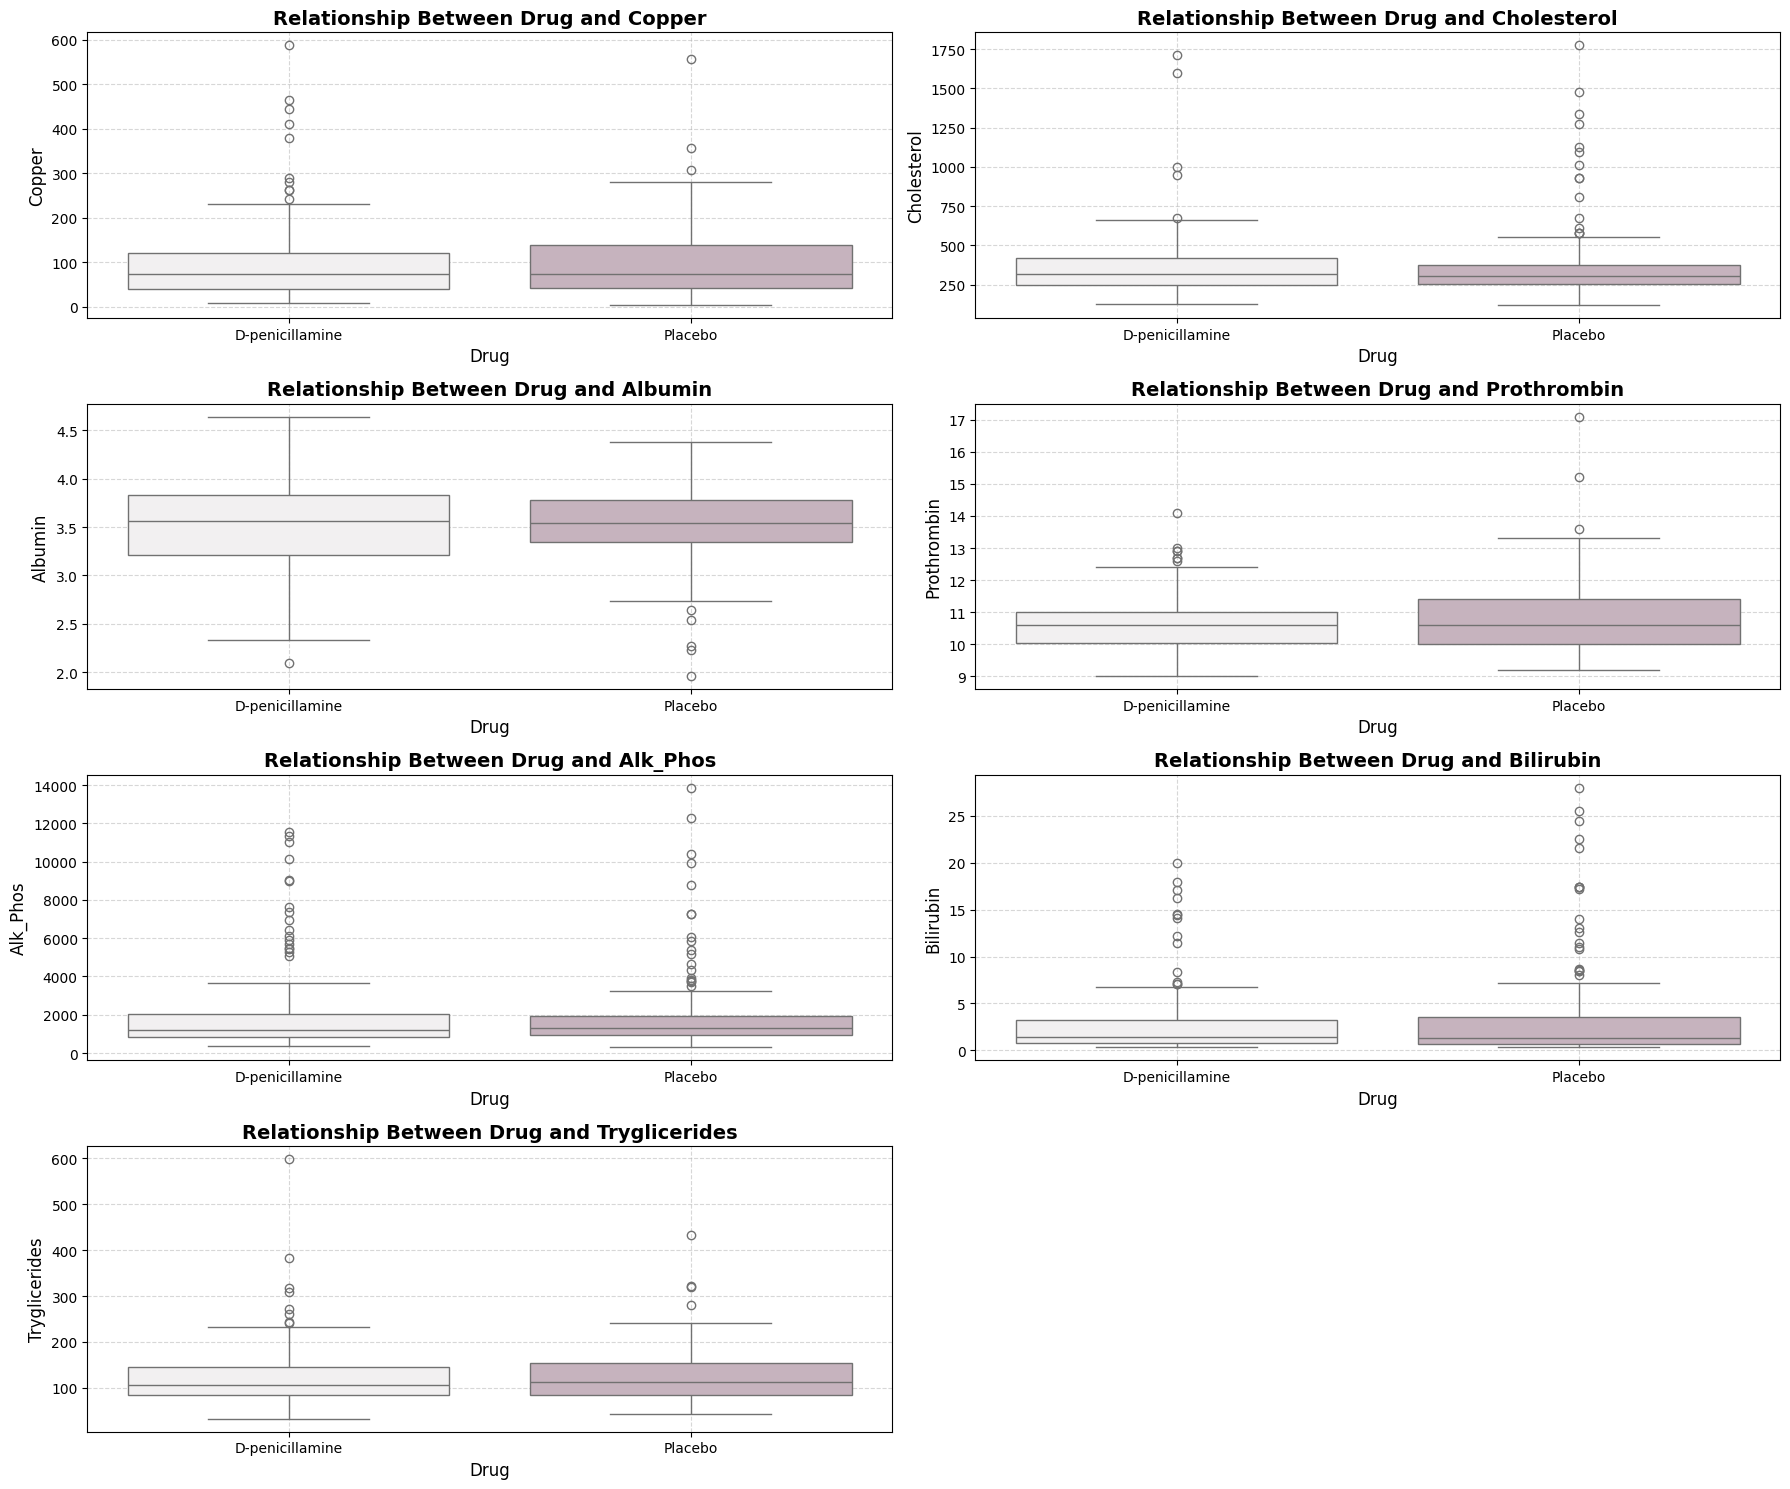

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extend the medical variables list to include Bilirubin and Tryglicerides
medical_vars_extended = ['Copper', 'Cholesterol', 'Albumin', 'Prothrombin', 'Alk_Phos', 'Bilirubin', 'Tryglicerides']

# Define a custom color palette using shades of the provided color
custom_palette = sns.light_palette("#79305a", n_colors=4, reverse=False)

# Create subplots to analyze the relationship between Drug and the extended medical variables
plt.figure(figsize=(18, 15))
for i, var in enumerate(medical_vars_extended, start=1):
    plt.subplot(4, 2, i)
    sns.boxplot(data=data, x='Drug', y=var, palette=custom_palette)
    plt.title(f'Relationship Between Drug and {var}', fontsize=14, fontweight='bold')  # Bold title
    plt.xlabel('Drug', fontsize=12)
    plt.ylabel(var, fontsize=12)
    plt.grid(True, alpha=0.5, linestyle='--')

plt.tight_layout()
plt.show()

<ipython-input-13-113e25ee7957>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Drug', y=var, palette=custom_palette)


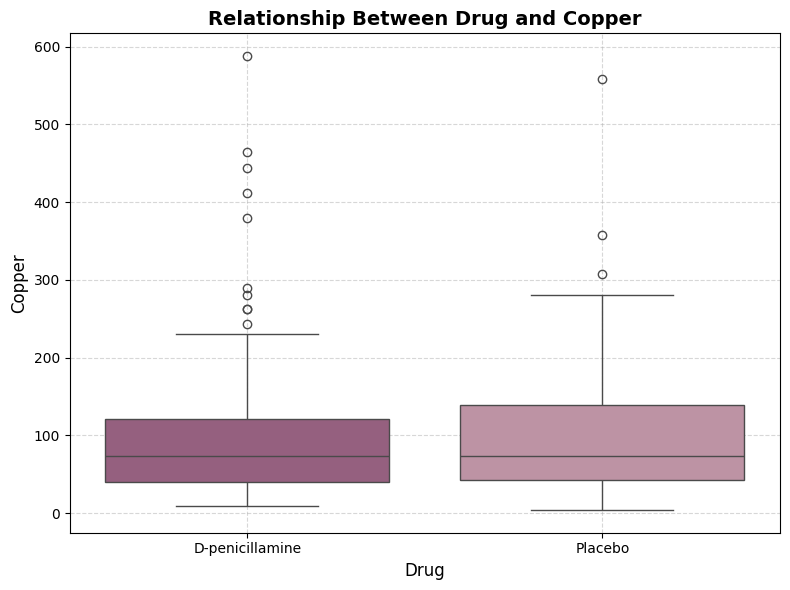

<ipython-input-13-113e25ee7957>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Drug', y=var, palette=custom_palette)


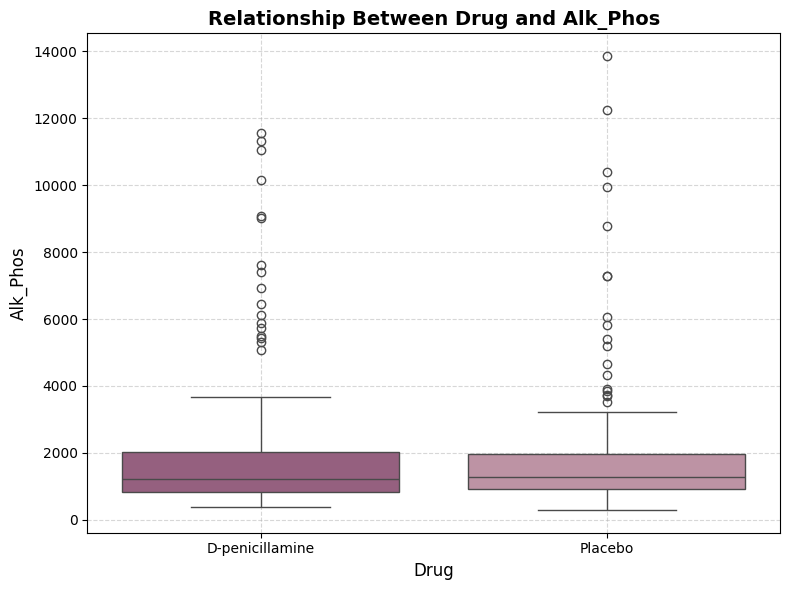

<ipython-input-13-113e25ee7957>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Drug', y=var, palette=custom_palette)


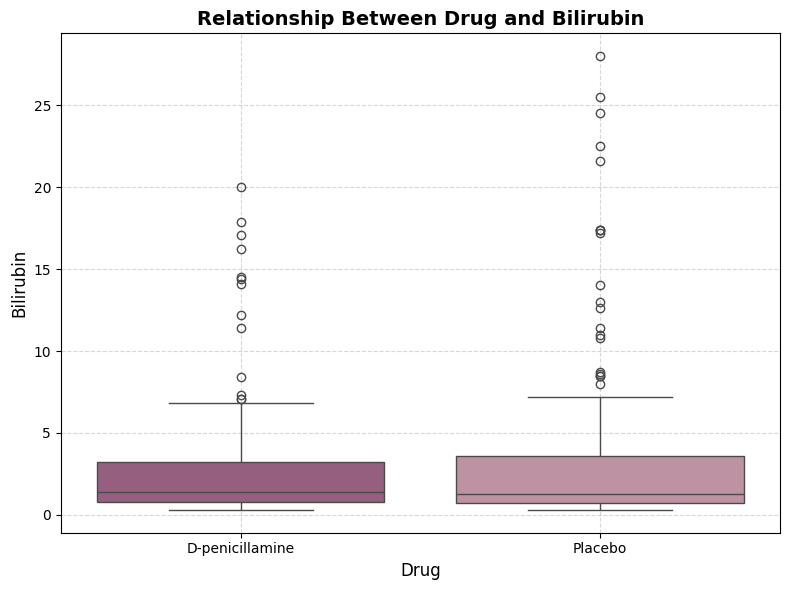

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the significant medical variables
significant_vars = ['Copper', 'Alk_Phos', 'Bilirubin']

# Define a two-color palette
custom_palette = ['#9e5780', '#c48ca3']

# Create separate plots for each significant variable with the updated palette
for var in significant_vars:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=data, x='Drug', y=var, palette=custom_palette)
    plt.title(f'Relationship Between Drug and {var}', fontsize=14, fontweight='bold')  # Bold title
    plt.xlabel('Drug', fontsize=12)
    plt.ylabel(var, fontsize=12)
    plt.grid(True, alpha=0.5, linestyle='--')
    plt.tight_layout()
    plt.show()

Disease Stage & Status

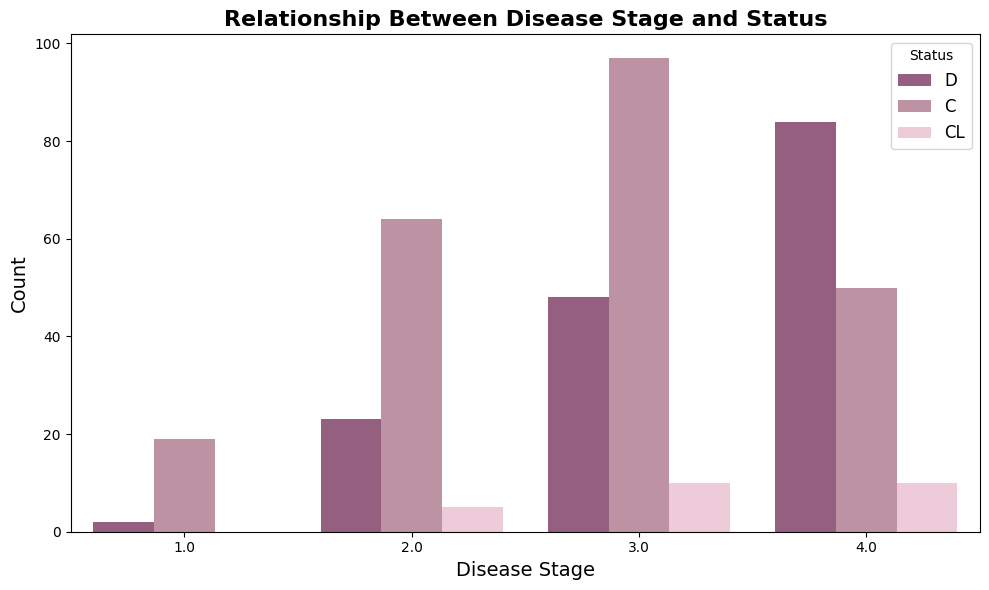

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a grouped bar chart to show the relationship between Disease Stage and Status
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Stage', hue='Status', palette=['#9e5780', '#c48ca3', '#f2c6d8'])

# Add titles and labels
plt.title('Relationship Between Disease Stage and Status', fontsize=16, fontweight='bold')  # Bold title
plt.xlabel('Disease Stage', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Status', fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()